In [3]:
import numpy as np
import pandas as pd

In [4]:
df= pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
df['spam']= df['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [7]:
df.shape

(5572, 3)

In [8]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


****Train Test Split****

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df.Message, df.spam, test_size=0.2)

In [10]:
X_train.shape

(4457,)

In [11]:
X_test.shape

(1115,)

In [12]:
type(X_train)

pandas.core.series.Series

In [13]:
X_train[:4]

1585                               Sorry, I'll call later
4344    Its a valentine game. . . send dis msg to all ...
1084    Wat makes some people dearer is not just de ha...
721                         Oh is it? Send me the address
Name: Message, dtype: object

In [14]:
type(y_train)

pandas.core.series.Series

In [15]:
y_train[:4]

1585    0
4344    0
1084    0
721     0
Name: spam, dtype: int64

In [16]:
type(X_train.values)

numpy.ndarray

****Create bag of words representation using CountVectorizer****

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
v= CountVectorizer()
X_train_cv= v.fit_transform(X_train.values)
X_train_cv

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 59397 stored elements and shape (4457, 7752)>

In [18]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4457, 7752))

In [19]:
v.get_feature_names_out()[1771]

'chef'

In [20]:
#v.vocabulary_

****Train the Naive Bayes Model****

In [21]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [22]:
#Here we are training the model and the model learns probabilities of words appearing in spam vs ham messages.

In [23]:
#training the model using:
#X_train_cv: The feature matrix (word counts for each message)
#y_train: The labels (spam or ham) for each message

In [24]:
X_test_cv= v.transform(X_test)

****Evaluate Performance****

In [25]:
from sklearn.metrics import classification_report
y_pred= model.predict(X_test_cv)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       972
           1       0.97      0.90      0.93       143

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [26]:
emails= [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count= v.transform(emails)
model.predict(emails_count)

array([0, 1])

****Train the model using sklearn pipeline and reduce number of lines of code****

In [27]:
from sklearn.pipeline import Pipeline
clf= Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [28]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [29]:
y_pred= clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       972
           1       0.97      0.90      0.93       143

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[968,   4],
       [ 15, 128]])

Text(58.222222222222214, 0.5, 'Truth')

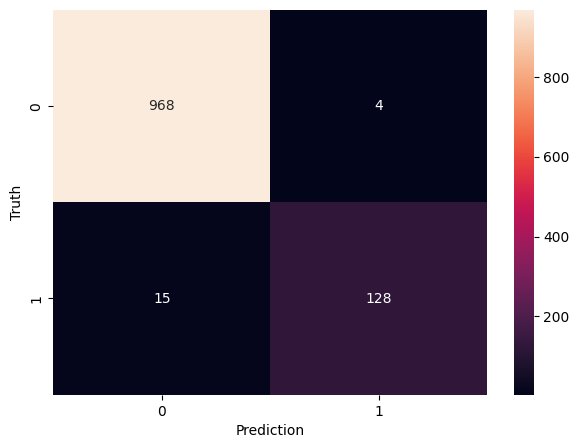

In [31]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')